In [26]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

# import matplotlib and set inline for jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from sklearn import datasets


In [27]:
data1 = pd.read_csv('20_1_label_audacity_fft_4096.csv')
data2 = pd.read_csv('3_1_label_audacity_fft_4096.csv')
data=pd.merge(data1, data2, how='outer')
Y = data['Label'].to_numpy()
data_x = data.iloc[:,:-1]
data_x.drop(columns='Time',axis=1,inplace=True)
X=data_x.to_numpy()

In [28]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

([], <a list of 0 Text major ticklabel objects>)

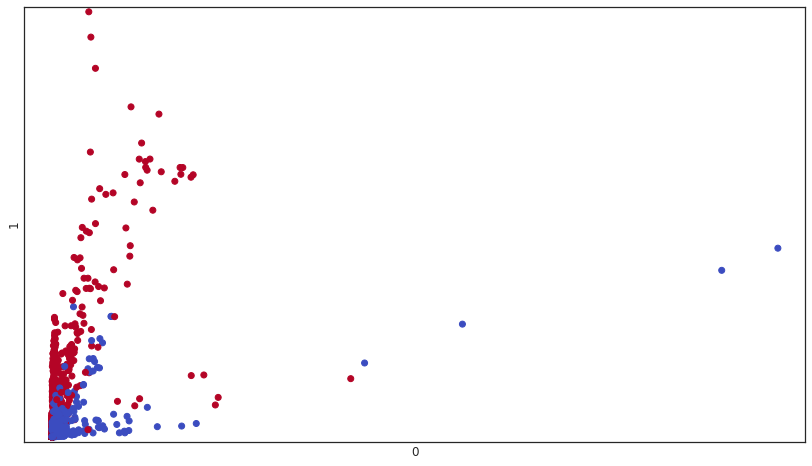

In [29]:
plt.figure(2, figsize=(14, 8))

plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.xlabel('0')
plt.ylabel('1')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

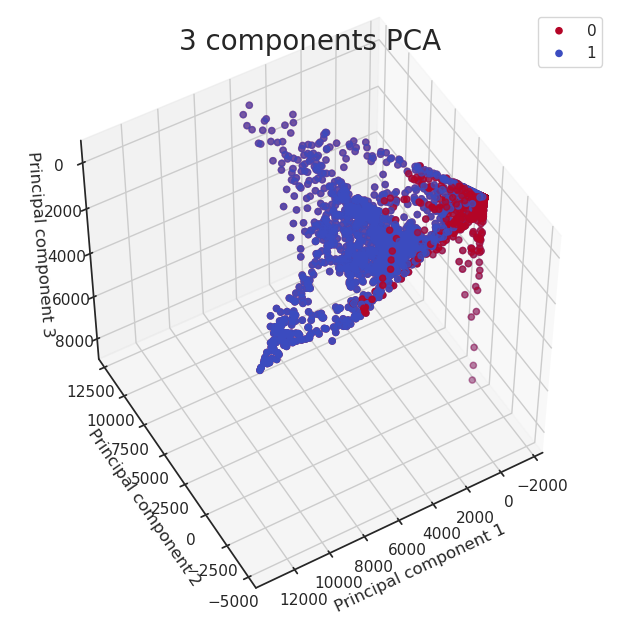

In [30]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(6,6) , dpi=(100))
ax = fig.add_subplot(1,1,1) 

ax = Axes3D(fig, elev=230, azim=120)
# ax.view_init(50, 25)

targets = [ 0 , 1 ]
colors = ['red', 'blue']
for target, color in zip(targets,colors):
    indicesToKeep = data['Label'] == target
    X_reduced = PCA(n_components=3).fit_transform(X)
    ax.scatter(X_reduced[:, 0] , X_reduced[:, 1], X_reduced[:, 2], c=indicesToKeep, 
               s=20,cmap=plt.cm.coolwarm_r,
               depthshade=True  )
   

   
ax.set_title("3 components PCA" ,  fontsize = 20)
ax.set_xlabel("Principal component 1" ,  fontsize = 12)
# ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("Principal component 2" ,  fontsize = 12)
# ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("Principal component 3" ,  fontsize = 12)
# ax.w_yaxis.set_ticklabels([])

targets = [  "0" , "1"] 
ax.legend(targets)
ax.grid(True)

plt.show()

In [31]:
fig.savefig('foo_3D.png' , dpi=(500))
# fig.savefig('foo_3D.pdf' ,  dpi=(500))